# chapter6

---

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---

# Support vector mashines

# 1. Marigins : intuition

`-` logistic function은 어떻게 분류했지?
   
   - 선형결합된 x가 로지스틱 함수에 대입이 되어 
   - $ h_\theta(x) = g(\theta^Tx)$ 
   - $\theta^Tx$가 0보다 매우 클수록 y=1로 예측이 되는 것에 확신이 들고 반대라면 y=0으로 예측이 된다 

`-` the different type of intuition

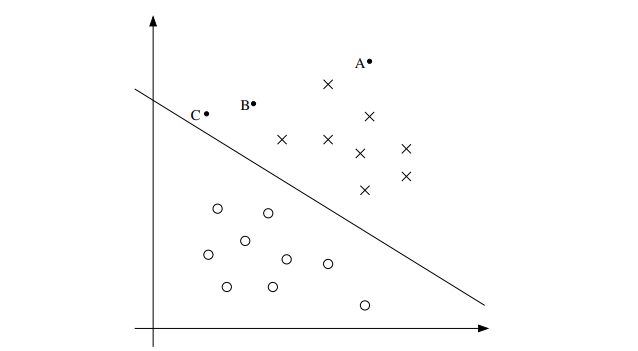

- x : positive
- o : negative

- **A**라는 점은 결정경계와 매우 멀다.
- 만약 1과 0으로 분류한다면 매우 높은 가능성으로 1로 분류하게 될것
- 그렇다면 **C**는 어떻지?
- C는 decision boundary와 매우 가까이 있어 조그마한 변화에도 잘못 분류가 될 수 있다

`-` 따라서

- 당연히 C보다 A의 예측에 더 확신이 있을 것이다.
- 즉 decision boundary와 멀리 떨어져 있다면 우리는 예측에 더욱 신뢰가 있을 수 있다.
- the notion of geometric margin을 이용하여 이것을 공식화해보려고 한다.

---

# 2. notation (option reading)

`-` x, y 

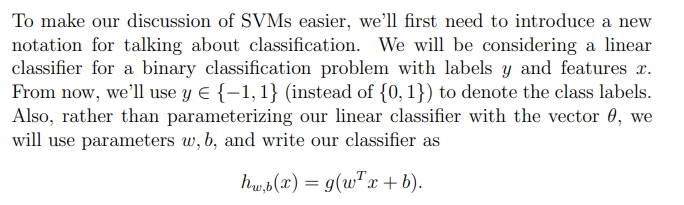

- y $\rightarrow${1,0} 대신에 y $\rightarrow${1,-1}
- 벡터로 이루어진 모수가 아닌 parameters w,b 사용

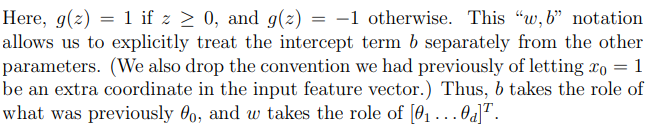

- "w,b" notation은 기존 선형결합이었던 $\theta^Tx$ 와는 달리 절편항 b를 분리할 수 있다.
- 또한 예전과 달리 $x_o = 1$로 두지 않을 것임
- 따라서 b는 $\theta_0$의 역할을 맡고 $\theta^T$의 역할은 w가 맡을 것이다

---

# 3. Functional and geometric margins (option reading)


`-` functional margin

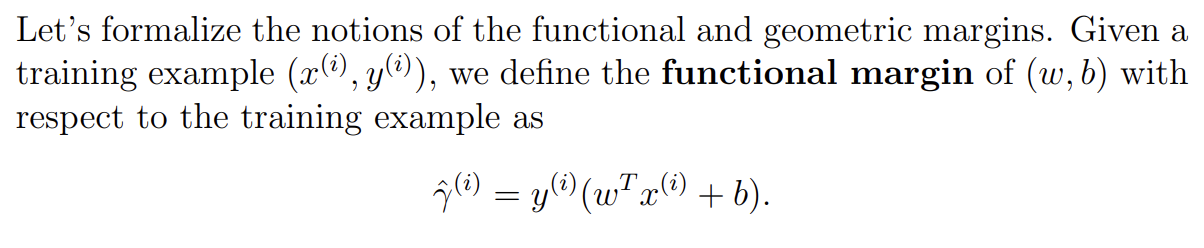

- 함수적으로 그리고 기하학적으로 마진을 공식화해보자.
- 어떠한 트레이닝 데이터$x^i,y^i$ 가 주어질 때
- functional margin을 위처럼 정의한다

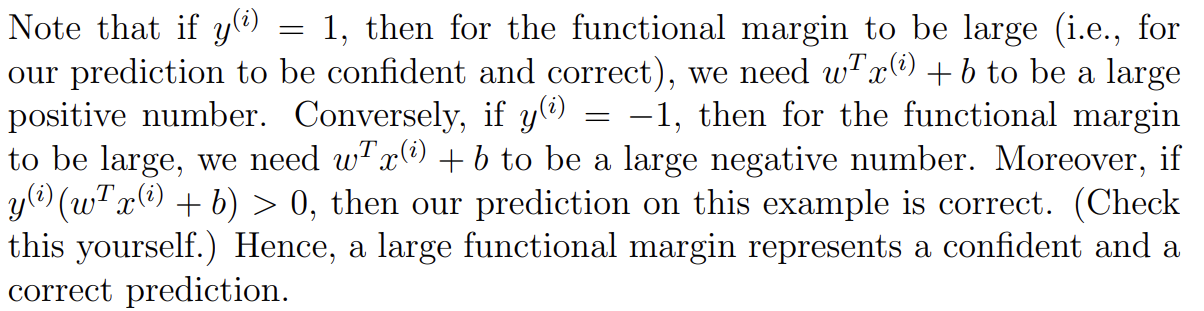

- y가 1일 때, 마진이 크려면 $w^Tx+b$가 큰 양수이어야한다.
- 반대로 y가 -1이면 큰 음수가 되어야함
- $y(w^Tx+b)$가 0보다 크면 올바르게 분류가 잘 된 것이다.
- 큰 functional margin 일수록 잘 분류가 된것이라고 봄

`-` normalization

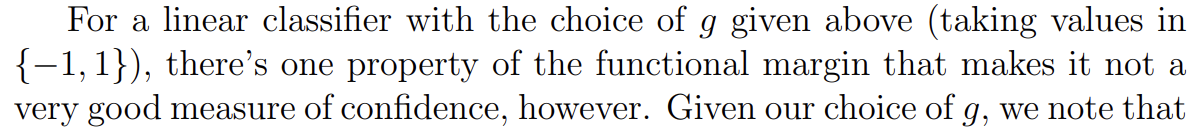

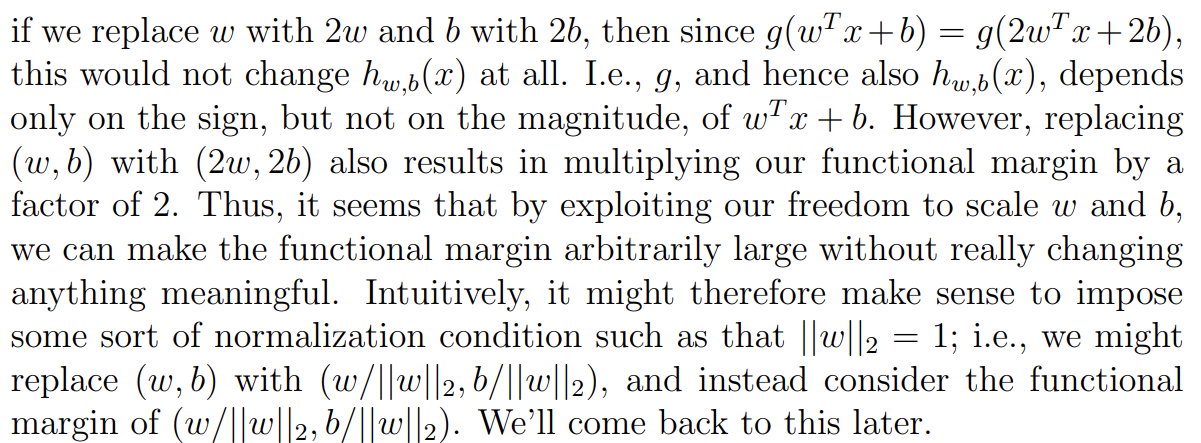

- 만약 w,b를 2w,2b로 대체한다면?
- 함수 자체에는 변화는 주지 않을 것이지만 왜냐하면 the magnitude가 아닌 the sign에 의존하기 때문에
- 이러한 것은 scale에 있어 자유로워 보인다.
- 그러나 이러한 크기가 커지는 것은 어떠한 의미있는 변화도 있지 않다
- 따라서 우리는 nomarlization condition을 부여하는 게 좋아보인다.

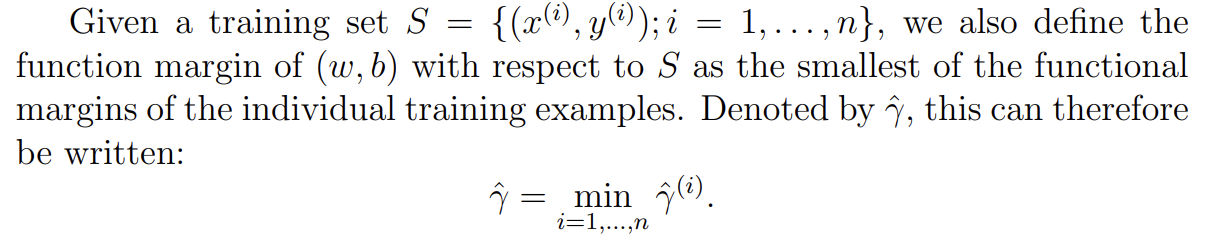

- 트레이닝 set S가 주어졌을 때, 우리는 w,b 그리고 S가 반영된 
각각의 샘플에 최소의 functional margins으로써 function margin을 정의할 수 있다.


`-` geometric margins

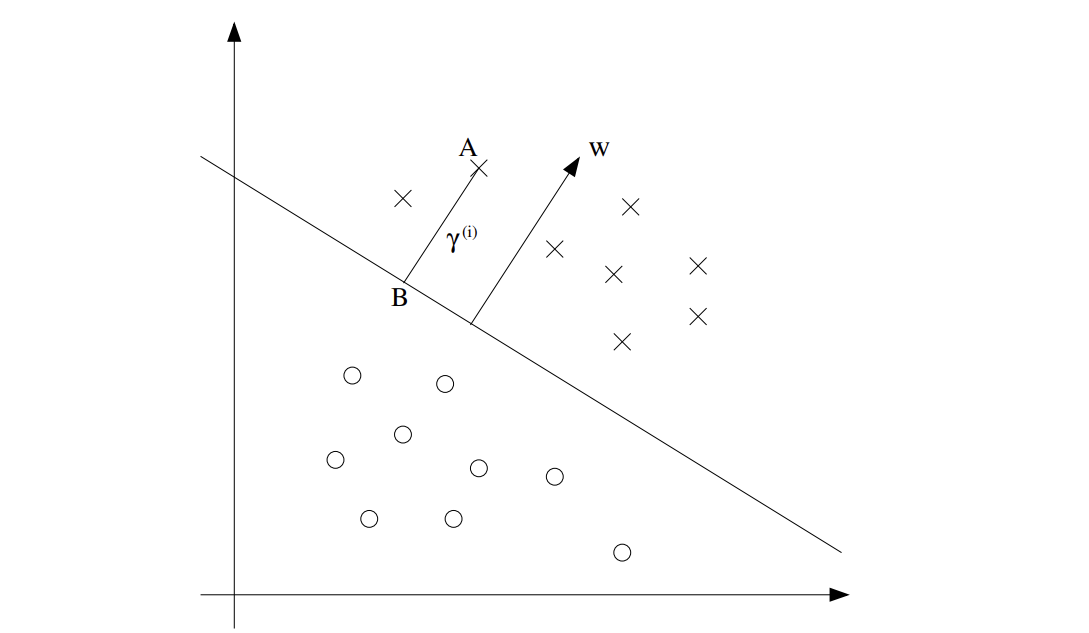

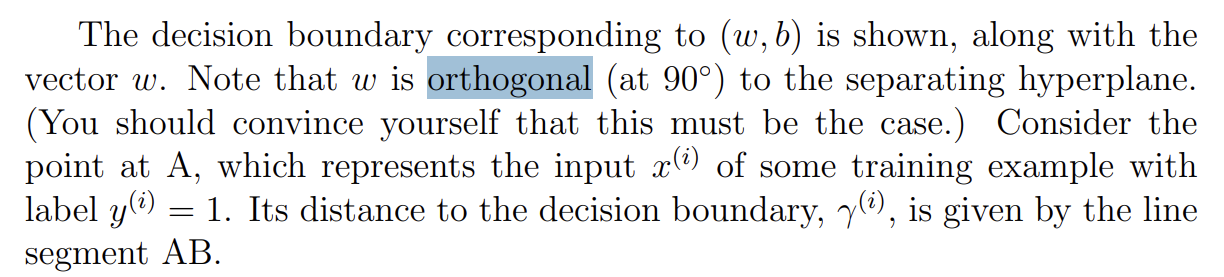

- decision boundary는 w, b에 응답하는 직선이다
- w는 separating hyperplane과 직선임
- A는 input x 의 training example with label y=1를 따르는 점
- decision boundary와 그것까지의 거리를 r로 둠
- 이것은 선분 AB로 주어진다.

`-` how can we find the value of $\gamma^i$

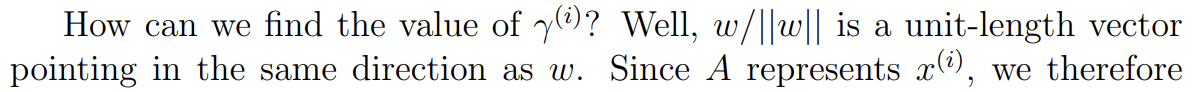

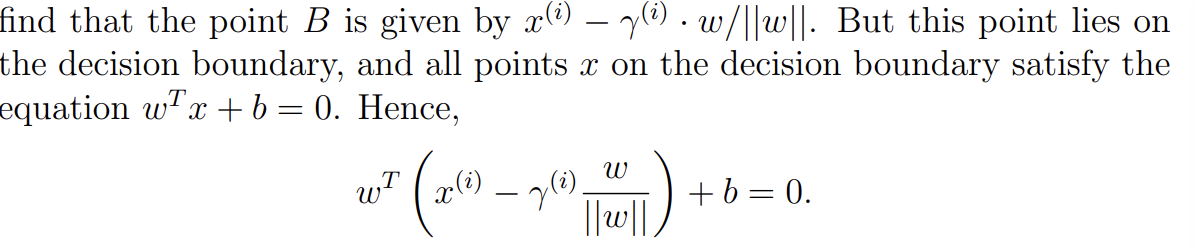

- w에 대한 단위 벡터는 방향이 같다.
- 따라서 $x^i$에 $\gamma^i$의 크기와 w의 단위벡터를 곱하고 빼준다면
- 그리고 점 B는 decision boundary에 놓여 있기 때문에 $w^Tx+b = 0$을 만족한다.

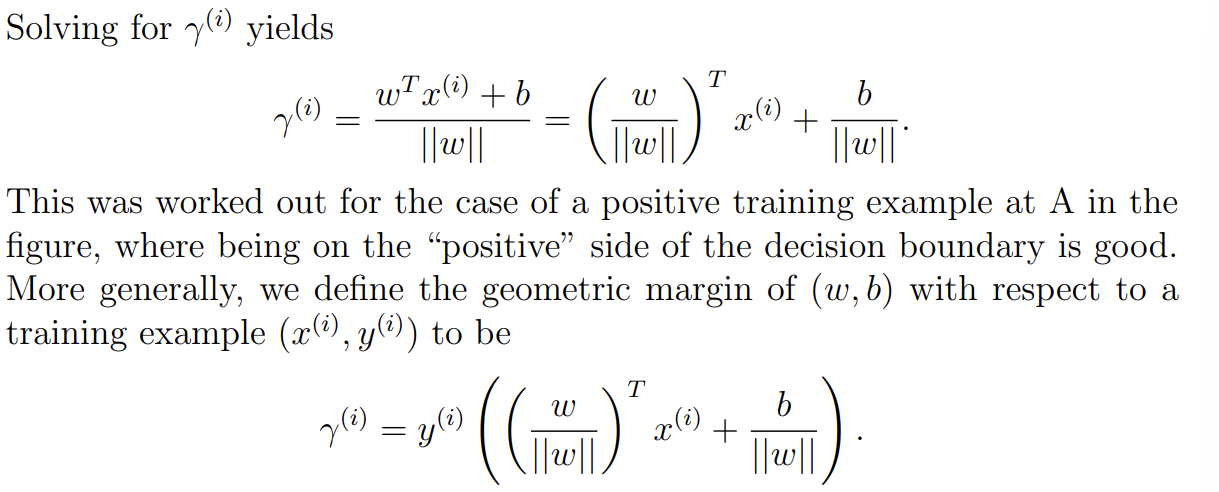

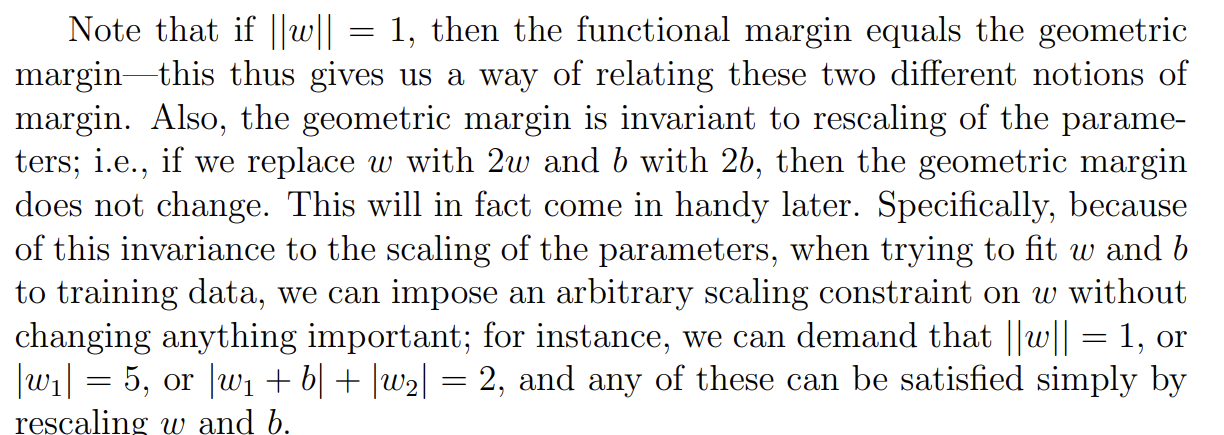

- $||w||$ =1 이라면 the funcntional margin과 geometric margin은 같을 것임
- 이것은 우리에게 이 다른 마진의 개념이 서로 관련되있다는 것을 알려준다.
- 또한 geometric margin은 크기에 영향을 받지 않는다.
- 이러한 속성(매개 변수의 스케일링에 대한 동일성) 때문에 중요한 것을 변경하지 않고 w에 임의의 스케일링 제약을 부과할 수 있다.


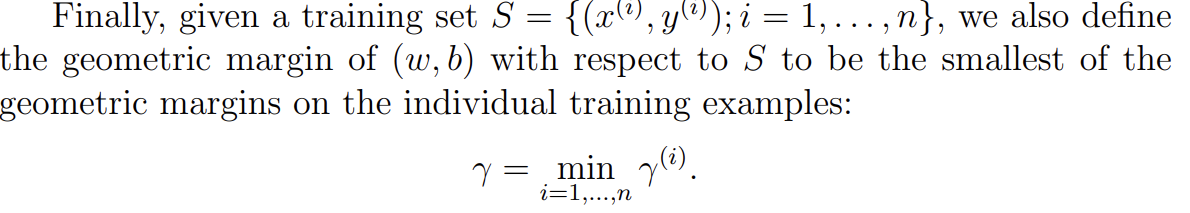

- 마찬가지로 훈련데이터 S가 주어졌을 때 우리는개개인의 훈련 샘플에 대한 the geometric margins의 최소가 되는 
S가 반영된 w,b 의 the geometric margin을 정의할 수 있다.

각각의 margin은 클수록 잘 분류가 된 것이고 분류를 잘 하기 위해 그중에서 최소의 margin을 찾는다.

---

`-` 실습 gpt로 구현

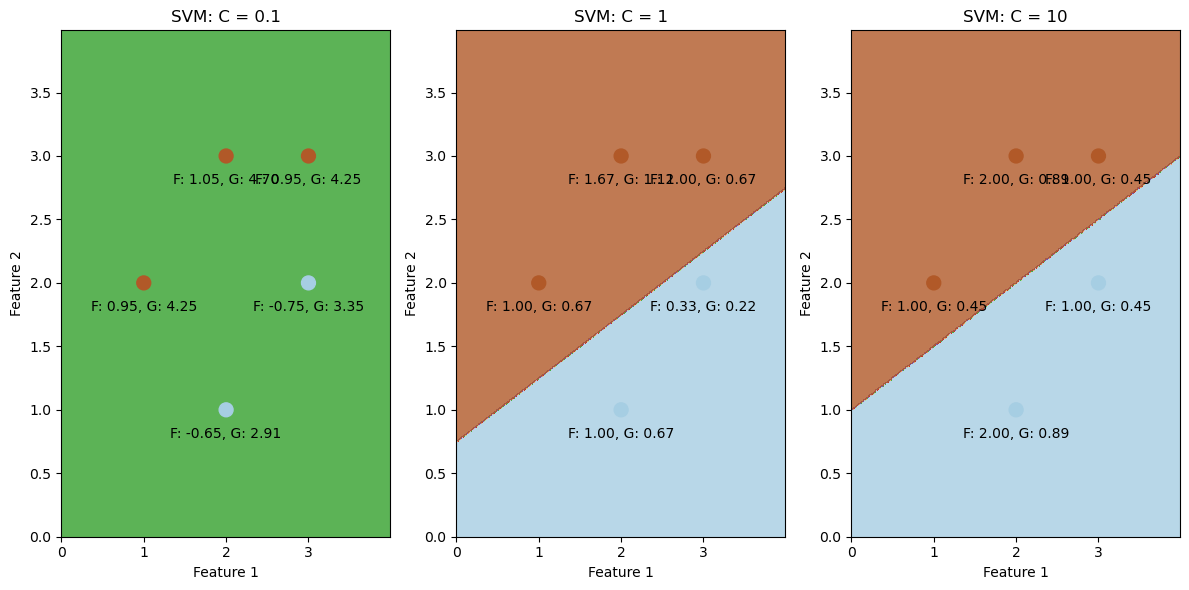

In [105]:
from sklearn import svm

# Sample data points and labels
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])

# Create a meshgrid to plot the decision boundary
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a subplot for plotting
plt.figure(figsize=(12, 6))

# Generate different decision boundaries and plot the margins
for i, C in enumerate([0.1, 1, 10]):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Get the weights and bias of the decision boundary
    weights = clf.coef_[0]
    bias = clf.intercept_[0]

    # Calculate the functional margin for each data point
    functional_margin = [y_i * (np.dot(weights, x_i) + bias) for x_i, y_i in zip(X, y)]

    # Calculate the geometric margin for each data point
    geometric_margin = [abs(margin) / np.linalg.norm(weights) for margin in functional_margin]

    # Get the decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

    # Annotate the support vectors with functional and geometric margins
    for j, txt in enumerate(functional_margin):
        plt.annotate("F: {:.2f}, G: {:.2f}".format(txt, geometric_margin[j]), (X[j][0], X[j][1]), textcoords="offset points", xytext=(0,-20), ha='center')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM: C = {C}')

plt.tight_layout()
plt.show()


---

# 4.The optimal margin classifier (option reading)

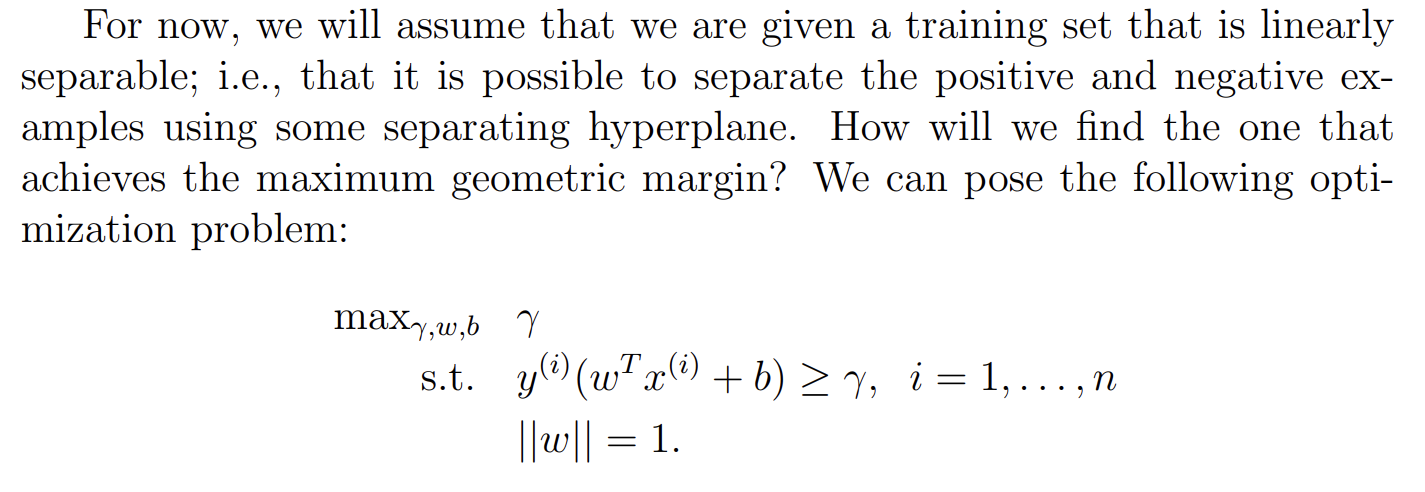

- 이제부터 리니어한 훈련세트를 줄 것
- 긍정과 부정으로 나누어지는 것이 가능하다
- 우리는 어떻게 최대의 margin을 찾아야 할까?
- 바로 위의 최적화 문제를 제시할 수 있음

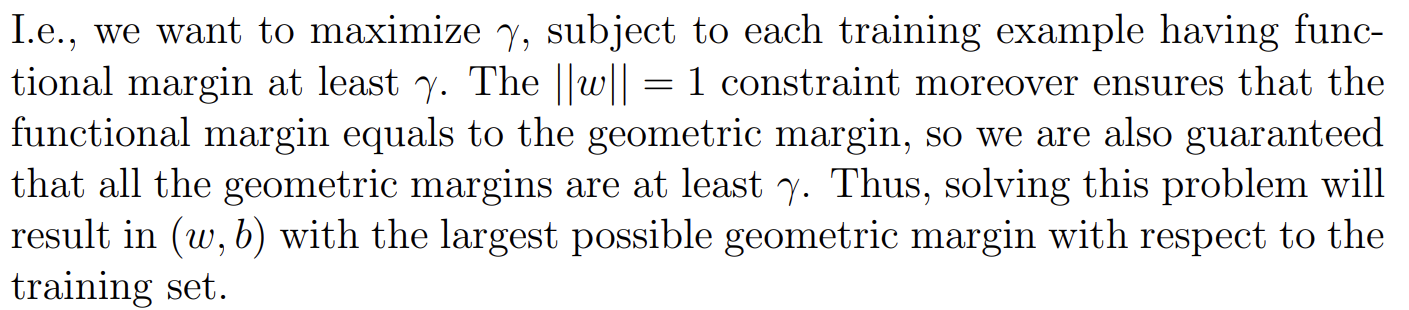

- 우리는 각각의 example이 함수마진이 적어도  $\gamma$인 것에 따라 $\gamma$를 최대화하길 원할 것임
- ||W||=1은 함수마진과 기하학적 마진과 같음을 보장하므로 모든 기하학적 마진이 적어도  $\gamma$임을 나타낸다.
- 이 문제를 푸는 것은 w,b가 훈련 셋에 대해서 가능한 가장 큰 기하학적 마진이라는 결과이다

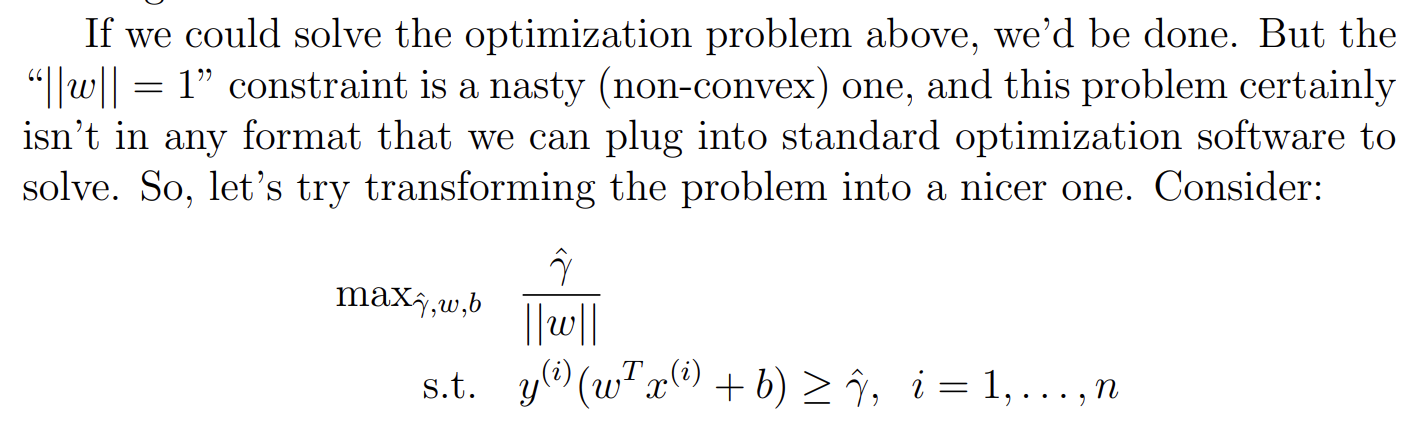

- 그렇지만 ||w||= 1이라는 조건은 쉽지 않다


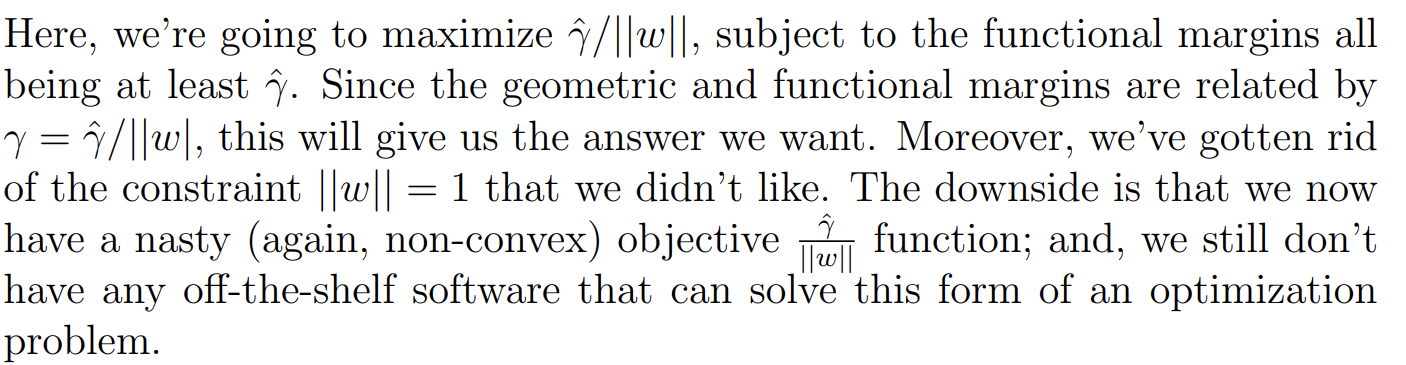

- 위와 같이 전환한다면 기하학적 마진과 함수적 마진이 연관되어 있다
- 또한 ||w||= 1이라는 조건이 없어짐
- 하지만 $\frac{\gamma}{||w||}$ 이라는 함수가 있다.

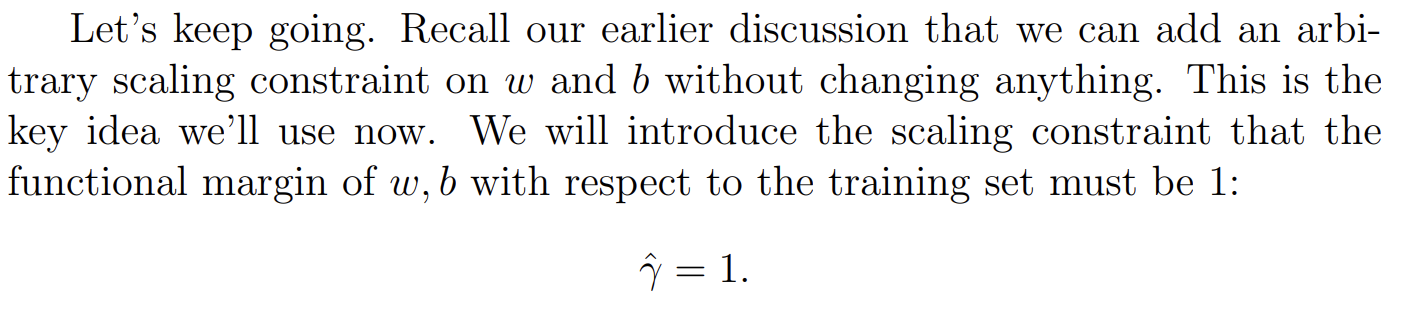

- 이전에 앞서 w와 b에 임의의 스켈일링 제약을 추가할 수 있었다는 말이 있었음
- 우리는 훈련집합에 대한 w,b의 함수 마진이 1이어야 한다는 추가적인 스케일링 제약을 소개할 것이다.

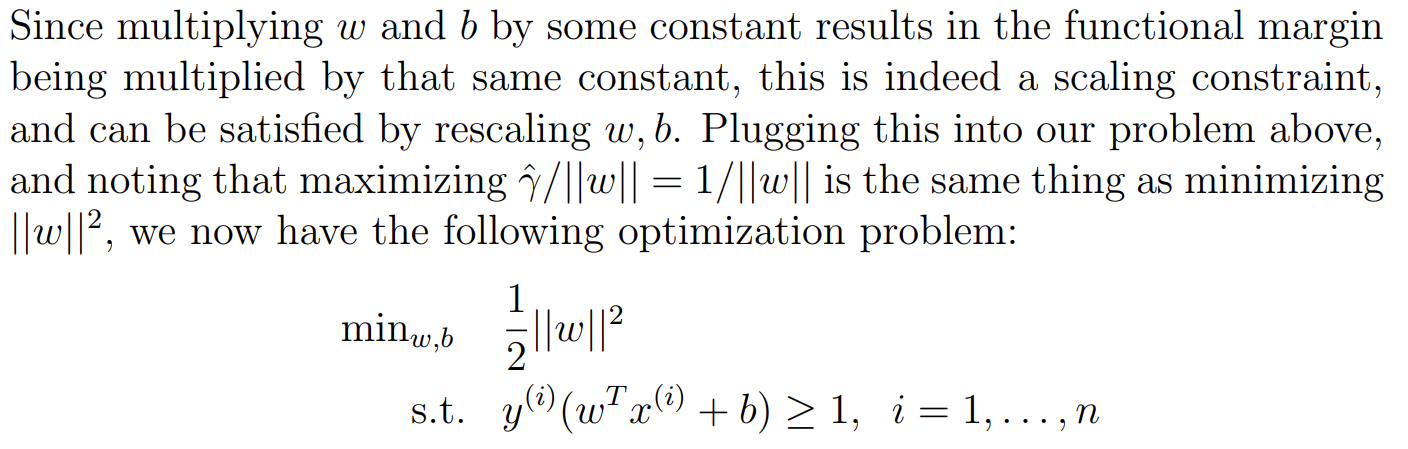

- SVM의 최적화 목표 : 함수적 마진을 최대화해야한다. 함수적 마진은 결정 경계와 모든 훈련 데이터 포인트 사이의 거리 중 가장 작은 값이므로 즉, 모든 데이터 포인트가 결정 경계로부터 최소한으로 1만큼 멀리 떨어져 있어야함

- 마진의 정규화 : SVM은 라그랑주 승수법(Lagrange Multiplier Method)을 사용하여 최적화 문제를 해결, 이때 마진을 1로 정규화하면 문제를 더 쉽게 다룰 수 있음

- 수학적인 편의성 : 마진을 1로 설정하면 SVM의 수학적인 계산이 간단해지며, 문제를 쉽게 최적화할 수 있다


- 2$\gamma$는 결국 $x^-$와 $x^+$의 거리라고도 볼 수 있다.
- $\lambda$ 임의의 양의 크기
$$
2\gamma = ||x^+ - x^-|| \\
x^+ = x^- + \lambda w \\
2\gamma = \lambda|| w||
$$

- 우리는 제약조건을 이용할 것임

$$
positive \rightarrow w^Tx^++b = 1 \\ 
nagative \rightarrow w^Tx^-+b = -1 \\
w^T(x^- + \lambda w) + b = -1 \\
w^Tx^- + \lambda w^Tw + b = -1 \\
- \lambda w^Tw = -2 \\
\lambda = \frac{2}{w^Tw}
$$

- 따라서
- $||w|| = \sqrt{w^Tw}$
$$
2\gamma = \frac{2}{w^Tw}||w||\\
\gamma = \frac{1}{||w||}
$$



---

In [120]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# Load the iris dataset
iris = load_iris()

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf']}

# Create an instance of the SVM classifier
svm = SVC()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the grid search to the data
best_model = grid_search.fit(iris.data, iris.target)

In [119]:
df = pd.DataFrame(best_model.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001000,0.000005,0.000200,0.000400,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.966667,0.966667,0.966667,0.966667,1.000000,0.973333,0.013333,7
1,0.001602,0.000488,0.000799,0.000400,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.900000,0.933333,0.900000,0.933333,0.933333,0.920000,0.016330,27
2,0.000600,0.000490,0.000400,0.000490,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.966667,0.966667,0.966667,0.966667,1.000000,0.973333,0.013333,7
3,0.001203,0.000399,0.000799,0.000399,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.933333,0.966667,0.933333,0.966667,1.000000,0.960000,0.024944,21
4,0.000999,0.000002,0.000400,0.000490,0.1,10,linear,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",0.966667,0.966667,0.966667,0.966667,1.000000,0.973333,0.013333,7
